# Importing Packages and Modules

In [93]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from collections import OrderedDict
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Importing All 2018 Data Points
    - Importing All 2018 Data Points
    - Merging And Concatenating All Datasets into One 
    - Drop Initial Variables that will not be used
    - Importing the Extracted Streets File to Subsized the Parking Ticket Data

In [ ]:
tickets_1 = pd.read_csv("https://opendata.arcgis.com/datasets/2c1b13f7617a4e48b3a31509891eb7e8_0.csv?session=254357730.1556151021")
tickets_2 = pd.read_csv("https://opendata.arcgis.com/datasets/34fed543751c4243b0c87681ec23040b_1.csv?session=254357730.1556151021")
tickets_4 = pd.read_csv("https://opendata.arcgis.com/datasets/acea7b6e71204d7c8e6e0a49d85314c9_3.csv?session=254357730.1556151021")
tickets_3 = pd.read_csv("https://opendata.arcgis.com/datasets/cc758488ebf94791a31bd8ec828ed109_2.csv?session=254357730.1556151021")
tickets_5 = pd.read_csv("https://opendata.arcgis.com/datasets/77cc474305f448c89a87144282b465d0_4.csv?session=254357730.1556151021")
tickets_6 = pd.read_csv("https://opendata.arcgis.com/datasets/803581a4a06c40b78ff5b2f828cc9200_5.csv?session=254357730.1556151021")
tickets_7 = pd.read_csv("https://opendata.arcgis.com/datasets/2c2b5da18d474164ac6f3e7e75a6545e_6.csv?session=254357730.1556151021")
tickets_8 = pd.read_csv("https://opendata.arcgis.com/datasets/ef6a77dd0bf6448ca8a8cb15f114b15e_7.csv?session=254357730.1556151021")
tickets_9 = pd.read_csv("https://opendata.arcgis.com/datasets/edef975c4f0f4eab9a073265ad3e85bb_8.csv?session=254357730.1556151021")
tickets_10 = pd.read_csv("https://opendata.arcgis.com/datasets/0bd2bbafabfb4b42b2f78cc76308fb04_9.csv?session=254357730.1556151021")
tickets_11 = pd.read_csv("https://opendata.arcgis.com/datasets/adde6e63410c44e78040eaefa7aa6153_10.csv?session=254357730.1556151021")
tickets_12 = pd.read_csv("https://opendata.arcgis.com/datasets/9374bdd3fa904146a5a8675e63c1847f_11.csv?session=254357730.1556151021")

In [ ]:
df_all= pd.concat([tickets_1,tickets_2, tickets_3, tickets_4, tickets_5, tickets_6, tickets_7, tickets_8, tickets_9, tickets_10, tickets_11, tickets_12], ignore_index=True)

In [ ]:
df_all = df_all.drop(columns=['ROWID_', 'DAY_OF_WEEK', 'HOLIDAY', 'WEEK_OF_YEAR', 'MONTH_OF_YEAR', 'ISSUE_TIME', 'BODY_STYLE'])
df_all.head()

In [2]:

streets = pd.read_csv('https://opendata.arcgis.com/datasets/23246020d6894453bdfcee00956df818_41.csv?session=254357730.1556151021')


/Users/irvinmull/anaconda3/lib/python2.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Data Description and Exploration

In [3]:
df_all.dtypes

X                        float64
Y                        float64
OBJECTID                   int64
VIOLATION_CODE            object
VIOLATION_DESCRIPTION     object
LOCATION                  object
RP_PLATE_STATE            object
ADDRESS_ID                 int64
STREETSEGID              float64
XCOORD                     int64
YCOORD                     int64
TICKET_ISSUE_DATE         object
dtype: object

In [4]:
#Checking to see the null/NA  values throughout the dataset.
df_all.isnull().sum()

X                            0
Y                            0
OBJECTID                     0
VIOLATION_CODE               0
VIOLATION_DESCRIPTION    45788
LOCATION                     0
RP_PLATE_STATE            7371
ADDRESS_ID                   0
STREETSEGID               7481
XCOORD                       0
YCOORD                       0
TICKET_ISSUE_DATE            0
dtype: int64

In [5]:
df_all.shape

(1366116, 12)

# Coding and Recoding Location
1. Locations are sort by Block and Street 
2. Merge Existing StreetsGID Dataset with out Tickets Database 

In [6]:
df_all.LOCATION.sort_values()

179181           0 BLOCK 10TH ST NE WEST SIDE
68999            0 BLOCK 10TH ST SE EAST SIDE
204595           0 BLOCK 10TH ST SE EAST SIDE
83754            0 BLOCK 10TH ST SE EAST SIDE
35869            0 BLOCK 10TH ST SE EAST SIDE
91064            0 BLOCK 10TH ST SE EAST SIDE
72002            0 BLOCK 10TH ST SE EAST SIDE
87818            0 BLOCK 10TH ST SE WEST SIDE
24633            0 BLOCK 10TH ST SE WEST SIDE
1128             0 BLOCK 10TH ST SE WEST SIDE
87817            0 BLOCK 10TH ST SE WEST SIDE
64456            0 BLOCK 10TH ST SE WEST SIDE
39696            0 BLOCK 10TH ST SE WEST SIDE
191833           0 BLOCK 11TH ST SE WEST SIDE
582186           0 BLOCK 14TH ST NW EAST SIDE
586106           0 BLOCK 14TH ST NW EAST SIDE
671981           0 BLOCK 14TH ST NW EAST SIDE
582510           0 BLOCK 14TH ST NW EAST SIDE
635785           0 BLOCK 14TH ST NW EAST SIDE
643792           0 BLOCK 14TH ST NW EAST SIDE
587615           0 BLOCK 14TH ST NW EAST SIDE
1081530          0 BLOCK 14TH ST N

In [7]:
streets= streets[streets.columns[streets.columns.isin(['STREETSEGID', 'ST_NAME', 'QUADRANT'])]]

In [8]:
streets= streets.dropna(subset=['STREETSEGID'])
streets= streets.drop_duplicates(subset=['STREETSEGID'], keep= 'first')

In [9]:
streets.head()

,STREETSEGID,ST_NAME,QUADRANT
2,4883.0,Fendall St,SE
3,3108.0,G St,NW
4,3650.0,MacArthur Blvd,NW
5,3318.0,Croffut Pl,SE
6,9384.0,Rock Creek Ford Rd,NW


### Merging Streets with Tickets Data
    - Enhancing the Dataset and joining on STREETSGID

In [10]:
merge = pd.merge(df_all, streets, on="STREETSEGID")

In [11]:
merge.shape

(1347002, 14)

In [12]:
merge.tail()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,ST_NAME,QUADRANT
1346997,-77.019728,38.944378,5650420,P013,PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY,507 WEBSTER ST NW,DC,247447,9270.0,398290,141831,2018-12-16T10:24:00.000Z,Webster St,NW
1346998,-76.984460,38.857313,5653811,P007,PARK IN A BUS ZONE,1500 BLOCK ERIE ST SE WEST SIDE,DC,800483,409.0,401349,132166,2018-12-20T01:52:00.000Z,Erie St,SE
1346999,-76.988467,38.945451,5654087,P104,FAIL TO DISPLAY CURRENT DC VEHICLE TAGS,FRONT OF 1300 ALLISON ST NE SOUT*,XX,68972,4613.0,401000,141950,2018-12-21T10:39:00.000Z,Allison St,NE
1347000,-76.988190,38.945442,5655783,P332,ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 1,1308 ALLISON ST NE,,68601,4613.0,401024,141949,2018-12-12T17:15:00.000Z,Allison St,NE
1347001,-76.943928,38.901901,5655779,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,981 KENILWORTH AVE NE,NaN,310104,3727.0,404864,137117,2018-12-13T11:41:00.000Z,Kenilworth Ave,NE


In [13]:
#Adding the Columns Together to Identify streets by Name and Quadrant
merge['modifed_st']= merge['ST_NAME']+ [","]+ merge['QUADRANT']

In [14]:
#Data Checks and Value Counts
merge.LOCATION.value_counts()

  1300 BLOCK CONNECTICUT AVE NW EA*    3898
  1300 BLOCK H ST NE SOUTH SIDE        2611
  3200 BLOCK WATER ST NW SOUTH SIDE    2453
  1400 BLOCK OKIE ST NE SOUTH SIDE     2267
   700 BLOCK 7TH ST NW WEST SIDE       2153
  1200 BLOCK G ST NW NORTH SIDE        2143
   900 BLOCK K ST NW NORTH SIDE        2102
  1300 BLOCK F ST NW NORTH SIDE        2078
  3200 BLOCK M ST NW NORTH SIDE        2057
  1200 BLOCK CONNECTICUT AVE NW EA*    2045
  1600 BLOCK K ST NW SOUTH SIDE        2029
  1500 BLOCK K ST NW SOUTH SIDE        1990
   600 BLOCK H ST NE SOUTH SIDE        1973
  1600 BLOCK K ST NW NORTH SIDE        1942
  1300 BLOCK G ST NW NORTH SIDE        1932
   600 BLOCK EYE ST NW SOUTH SIDE      1908
   300 BLOCK 7TH ST NW EAST SIDE       1886
  1300 BLOCK G ST NW SOUTH SIDE        1851
  1200 BLOCK F ST NW NORTH SIDE        1849
  1300 BLOCK S ST NW NORTH SIDE        1825
  1300 BLOCK H ST NE NORTH SIDE        1776
  1100 BLOCK VERMONT AVE NW WEST S*    1770
  1800 BLOCK NEW YORK AVE NE SOU

# Coding and Recoding Date and Time 
     -Explore Ticket Data and Time Variable 
     -Sum Ticket Data and Time Variable 
     -Create New Variables for Month, Year, Day and Hour

In [15]:
#Data Check
merge['TICKET_ISSUE_DATE'].head()

0    2018-01-31T13:03:00.000Z
1    2018-01-19T00:00:00.000Z
2    2018-01-14T21:58:00.000Z
3    2018-01-12T12:50:00.000Z
4    2018-01-12T10:04:00.000Z
Name: TICKET_ISSUE_DATE, dtype: object

In [16]:
#Data Value Counts
merge['TICKET_ISSUE_DATE'].value_counts()

2018-05-10T00:00:00.000Z    1592
2018-05-24T00:00:00.000Z    1585
2018-04-23T00:00:00.000Z    1580
2018-03-15T00:00:00.000Z    1568
2018-02-22T00:00:00.000Z    1510
2018-03-14T00:00:00.000Z    1481
2018-10-25T00:00:00.000Z    1438
2018-05-09T00:00:00.000Z    1432
2018-03-29T00:00:00.000Z    1428
2018-08-23T00:00:00.000Z    1428
2018-03-28T00:00:00.000Z    1418
2018-09-26T00:00:00.000Z    1411
2018-04-11T00:00:00.000Z    1403
2018-03-27T00:00:00.000Z    1389
2018-05-08T00:00:00.000Z    1379
2018-05-21T00:00:00.000Z    1371
2018-04-04T00:00:00.000Z    1367
2018-06-20T00:00:00.000Z    1359
2018-07-16T00:00:00.000Z    1357
2018-05-02T00:00:00.000Z    1357
2018-08-09T00:00:00.000Z    1351
2018-04-26T00:00:00.000Z    1350
2018-10-31T00:00:00.000Z    1349
2018-04-30T00:00:00.000Z    1348
2018-06-07T00:00:00.000Z    1347
2018-04-03T00:00:00.000Z    1344
2018-07-31T00:00:00.000Z    1339
2018-02-01T00:00:00.000Z    1338
2018-05-01T00:00:00.000Z    1337
2018-02-26T00:00:00.000Z    1336
          

In [17]:
#Converting the Ticket Issue Date to Date and Time
merge['TICKET_ISSUE_DATE']= pd.to_datetime(df_all['TICKET_ISSUE_DATE'])

In [18]:
#Data Check
merge.head(100)

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,ST_NAME,QUADRANT,modifed_st
0,-76.990241,38.880276,3697391,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE EAST SIDE,VA,802346,3122.0,400847,134715,2018-01-31 13:03:00+00:00,12th St,SE,"12th St,SE"
1,-76.989837,38.880700,3711217,P168,NO FRONT TAGS.,FRONT OF 700 12TH ST SE SOUTH S*,VA,288859,3122.0,400882,134762,2018-01-31 11:57:00+00:00,12th St,SE,"12th St,SE"
2,-76.989837,38.880700,3717999,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,700 12TH ST SE,MD,288859,3122.0,400882,134762,2018-01-31 19:28:00+00:00,12th St,SE,"12th St,SE"
3,-76.990241,38.880276,3718722,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,134715,2018-01-31 12:48:00+00:00,12th St,SE,"12th St,SE"
4,-76.990241,38.880276,3718875,P170,FAILURE TO DISPLAY CURRENT TAGS,700 BLOCK 12TH ST SE EAST SIDE,DC,802346,3122.0,400847,134715,2018-01-31 00:00:00+00:00,12th St,SE,"12th St,SE"
5,-76.990241,38.880276,3727289,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,134715,2018-01-31 23:03:00+00:00,12th St,SE,"12th St,SE"
6,-76.990241,38.880276,3728615,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,MD,802346,3122.0,400847,134715,2018-01-31 23:16:00+00:00,12th St,SE,"12th St,SE"
7,-76.990241,38.880276,3763680,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,134715,2018-01-31 10:01:00+00:00,12th St,SE,"12th St,SE"
8,-76.990241,38.880276,3768817,P013,PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY,700 BLOCK 12TH ST SE WEST SIDE,MD,802346,3122.0,400847,134715,2018-01-31 23:18:00+00:00,12th St,SE,"12th St,SE"
9,-76.990241,38.880276,3778947,P170,FAILURE TO DISPLAY CURRENT TAGS,700 BLOCK 12TH ST SE EAST SIDE,NaN,802346,3122.0,400847,134715,2018-01-31 00:00:00+00:00,12th St,SE,"12th St,SE"


# Feature Engineering 
    -Create Issue Hour from Ticket Issue Date 
    -Create Issue Year from Ticket Issue Date
    -Create Issue Month from Ticket Issue Date
    -Create Issue Month Year from Ticket Issue Date
    -Create Issue Weekday from Ticket Issue Date

In [19]:
merge['Issue_Hour'] = pd.DatetimeIndex(merge['TICKET_ISSUE_DATE']).hour
merge['Issue_Year'] = pd.DatetimeIndex(merge['TICKET_ISSUE_DATE']).year
merge['Issue_Month'] = pd.DatetimeIndex(merge['TICKET_ISSUE_DATE']).month
merge['Issue_Month_Year'] = pd.to_datetime(merge['TICKET_ISSUE_DATE']).dt.to_period('M')
merge['Issue_Weekday'] = pd.to_datetime(merge['TICKET_ISSUE_DATE']).dt.weekday_name
merge.tail(50)

/Users/irvinmull/anaconda3/lib/python2.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,ST_NAME,QUADRANT,modifed_st,Issue_Hour,Issue_Year,Issue_Month,Issue_Month_Year,Issue_Weekday
1346952,-77.004052,38.955091,5530378,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,SIDE OF 5321 1ST PL NE EAST SIDE,MD,10176,14176.0,399649,143020,2018-12-05 21:35:00+00:00,1st Pl,NE,"1st Pl,NE",21,2018,12,2018-12,Wednesday
1346953,-77.004594,38.955118,5615232,P050,PARKED WITHIN 25 FEET OF A STOP SIGN,5400 BLOCK 1ST PL NE EAST SIDE,DC,815970,14176.0,399602,143023,2018-12-04 11:09:00+00:00,1st Pl,NE,"1st Pl,NE",11,2018,12,2018-12,Tuesday
1346954,-77.004594,38.955118,5652305,P168,NO FRONT TAGS.,5400 BLOCK 1ST PL NE EAST SIDE,DC,815970,14176.0,399602,143023,2018-12-18 00:00:00+00:00,1st Pl,NE,"1st Pl,NE",0,2018,12,2018-12,Tuesday
1346955,-77.070635,38.958132,5532709,P020,PARK WITHIN 10 FEET OF A FIRE HYDRANT,5218 CHEVY CHASE PKWY NW,VA,264201,9866.0,393878,143360,2018-12-12 10:04:00+00:00,Chevy Chase Pkwy,NW,"Chevy Chase Pkwy,NW",10,2018,12,2018-12,Wednesday
1346956,-77.000463,38.907644,5532846,P036,PARK IN OFFICIAL PARKING PERMIT ONLY SPACE,1240 4TH ST NE,VA,285974,11606.0,399960,137753,2018-12-16 23:17:00+00:00,4th St,NE,"4th St,NE",23,2018,12,2018-12,Sunday
1346957,-76.974699,38.896570,5533447,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,FRONT OF 512 21ST ST NE WEST SI*,MD,13120,12363.0,402195,136524,2018-12-07 17:01:00+00:00,21st St,NE,"21st St,NE",17,2018,12,2018-12,Friday
1346958,-76.974572,38.897057,5570638,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,FRONT OF 532 21ST ST NE WEST SI*,AZ,10347,12363.0,402206,136578,2018-12-10 02:20:00+00:00,21st St,NE,"21st St,NE",2,2018,12,2018-12,Monday
1346959,-77.076784,38.946922,5533687,P002,STAND OR PARK IN ALLEY,REAR OF 4415 39TH ST NW EAST SIDE,VA,222382,12877.0,393344,142116,2018-12-03 10:46:00+00:00,39th St,NW,"39th St,NW",10,2018,12,2018-12,Monday
1346960,-77.058757,38.964256,5534022,P170,FAILURE TO DISPLAY CURRENT TAGS,5500 29TH ST NW,DC,807105,6088.0,394908,144039,2018-12-05 10:16:00+00:00,29th St,NW,"29th St,NW",10,2018,12,2018-12,Wednesday
1346961,-77.021371,38.961124,5534084,P002,STAND OR PARK IN ALLEY,REAR OF 600 OGLETHORPE ST NW SO*,OR,246569,7689.0,398148,143690,2018-12-06 18:02:00+00:00,Oglethorpe St,NW,"Oglethorpe St,NW",18,2018,12,2018-12,Thursday


In [382]:
#Creating Categorical Variable from Issue Time based on Common Times of Day
merge['time_coded'] = ''
merge.loc[(merge['Issue_Hour'] >= 0) & (merge['Issue_Hour'] <= 5), 'time_coded'] = 'night'
merge.loc[(merge['Issue_Hour'] > 5) & (merge['Issue_Hour'] <= 12), 'time_coded'] = 'morning'
merge.loc[(merge['Issue_Hour'] > 12) & (merge['Issue_Hour'] <= 17), 'time_coded'] = 'afternoon'
merge.loc[(merge['Issue_Hour'] > 17) & (merge['Issue_Hour'] <= 21), 'time_coded'] = 'evening'
merge.loc[(merge['Issue_Hour'] > 21) & (merge['Issue_Hour'] <= 24), 'time_coded'] = 'night'


# Data Preprocessing 
    -Variable Encoding for Modifed Location 
    -Variable Encoding for Time of Day
    -Creating a Variable that is an Interaction Between Issue Hour and Location (Used to Identify Risk) 

In [384]:
#Data Preprocessing 
prep = preprocessing.LabelEncoder()
merge['Modified_Location_Encode'] = prep.fit_transform(merge['modifed_st'].astype(str))
merge['Issue_Weekday_Encode'] = prep.fit_transform(merge['Issue_Weekday'].astype(str))
merge['time_encoded']= prep.fit_transform(merge['time_coded'].astype(str))
merge.tail(500000)

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,...,Issue_Month,Issue_Month_Year,Issue_Weekday,Modified_Location_Encode,Issue_Hour_Loc_Count,t_risk_level,Issue_Weekday_Encode,time_coded,loc2,time_encoded
847002,-77.056309,38.933512,4961042,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,2900 BLOCK MACOMB ST NW NORTH SI*,DC,802682,2060.0,395118,...,8,2018-08,Thursday,894,5436,1,4,morning,morning,2
847003,-77.056309,38.933512,4968778,P113,FAIL TO DISPLAY CURRENT INSPECTION STICKER,2900 BLOCK MACOMB ST NW SOUTH SI*,VA,802682,2060.0,395118,...,8,2018-08,Tuesday,894,7749,1,5,night,night,3
847004,-77.056309,38.933512,4976210,P013,PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY,2900 BLOCK MACOMB ST NW NORTH SI*,DC,802682,2060.0,395118,...,8,2018-08,Wednesday,894,5441,1,6,morning,morning,2
847005,-77.056309,38.933512,5024076,P013,PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY,2900 BLOCK MACOMB ST NW NORTH SI*,CA,802682,2060.0,395118,...,8,2018-08,Friday,894,5393,1,0,morning,morning,2
847006,-77.056309,38.933512,5028028,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,2900 BLOCK MACOMB ST NW NORTH SI*,MD,802682,2060.0,395118,...,8,2018-08,Friday,894,7749,1,0,night,night,3
847007,-77.056309,38.933512,5027385,P076,NaN,2900 BLOCK MACOMB ST NW NORTH SI*,MD,802682,2060.0,395118,...,8,2018-08,Wednesday,894,5441,1,6,morning,morning,2
847008,-77.056309,38.933512,5031873,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,2900 BLOCK MACOMB ST NW NORTH SI*,MD,802682,2060.0,395118,...,8,2018-08,Monday,894,7749,1,1,night,night,3
847009,-77.056309,38.933512,5347303,P020,PARK WITHIN 10 FEET OF A FIRE HYDRANT,2900 BLOCK MACOMB ST NW NORTH SI*,VA,802682,2060.0,395118,...,8,2018-08,Thursday,894,4051,0,4,evening,evening,1
847010,-77.056309,38.933512,5345915,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,2900 BLOCK MACOMB ST NW NORTH SI*,DC,802682,2060.0,395118,...,8,2018-08,Tuesday,894,4279,0,5,afternoon,afternoon,0
847011,-77.056309,38.933512,5345916,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,2900 BLOCK MACOMB ST NW NORTH SI*,DC,802682,2060.0,395118,...,8,2018-08,Sunday,894,6206,1,3,night,night,3


In [385]:
#Data Checks and Value Counts
merge.Modified_Location_Encode.value_counts()

805     34274
473     26699
755     26652
889     24425
639     24035
28      23599
584     22919
257     21210
541     19423
687     19000
14      18108
969     18086
267     17686
686     17205
262     16538
1391    14509
251     13745
21      13672
1177    13580
242     13484
8       13293
50      12544
44      11338
2       11335
1068    11314
66      11285
55      11185
1252    11099
475     10989
1047    10750
        ...  
95          1
1147        1
982         1
419         1
330         1
727         1
312         1
205         1
705         1
942         1
725         1
319         1
936         1
631         1
326         1
437         1
1229        1
1301        1
1175        1
1179        1
691         1
644         1
681         1
1042        1
752         1
286         1
1066        1
1365        1
103         1
31          1
Name: Modified_Location_Encode, Length: 1407, dtype: int64

In [386]:
##Data Intergrity Check for Modified St
len(merge.Modified_Location_Encode.unique().tolist())

1407

In [387]:
#Data Intergrity Check for Modified St
len(merge.modifed_st.unique().tolist())

1407

# Featuring Engineering Cont'd
    -Creating a Variable that is an Interaction Between Issue Hour and Location (Used to Identify Risk) 
    -Setting the Parameters for Low and High Risk 
    -Creating the Catgorical Risk Variable

In [388]:
#Creating Interaction between Issue Hour and Location and transforming the Values
merge['Issue_Hour_Loc_Count'] = merge['Modified_Location_Encode'].groupby(merge['Issue_Hour']).transform('value_counts')

In [389]:
#Data Checks
merge.head(50000)

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,...,Issue_Month,Issue_Month_Year,Issue_Weekday,Modified_Location_Encode,Issue_Hour_Loc_Count,t_risk_level,Issue_Weekday_Encode,time_coded,loc2,time_encoded
0,-76.990241,38.880276,3697391,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE EAST SIDE,VA,802346,3122.0,400847,...,1,2018-01,Wednesday,15,5154,1,6,afternoon,afternoon,0
1,-76.989837,38.880700,3711217,P168,NO FRONT TAGS.,FRONT OF 700 12TH ST SE SOUTH S*,VA,288859,3122.0,400882,...,1,2018-01,Wednesday,15,5436,1,6,morning,morning,2
2,-76.989837,38.880700,3717999,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,700 12TH ST SE,MD,288859,3122.0,400882,...,1,2018-01,Wednesday,15,4051,0,6,evening,evening,1
3,-76.990241,38.880276,3718722,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,...,1,2018-01,Wednesday,15,5393,1,6,morning,morning,2
4,-76.990241,38.880276,3718875,P170,FAILURE TO DISPLAY CURRENT TAGS,700 BLOCK 12TH ST SE EAST SIDE,DC,802346,3122.0,400847,...,1,2018-01,Wednesday,15,7749,1,6,night,night,3
5,-76.990241,38.880276,3727289,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,...,1,2018-01,Wednesday,15,3129,0,6,night,night,3
6,-76.990241,38.880276,3728615,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,MD,802346,3122.0,400847,...,1,2018-01,Wednesday,15,3129,0,6,night,night,3
7,-76.990241,38.880276,3763680,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,...,1,2018-01,Wednesday,15,5441,1,6,morning,morning,2
8,-76.990241,38.880276,3768817,P013,PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY,700 BLOCK 12TH ST SE WEST SIDE,MD,802346,3122.0,400847,...,1,2018-01,Wednesday,15,3129,0,6,night,night,3
9,-76.990241,38.880276,3778947,P170,FAILURE TO DISPLAY CURRENT TAGS,700 BLOCK 12TH ST SE EAST SIDE,NaN,802346,3122.0,400847,...,1,2018-01,Wednesday,15,7749,1,6,night,night,3


In [390]:
#Data Descriptives 
merge.Issue_Hour_Loc_Count.describe()

count    1.347002e+06
mean     5.402487e+03
std      1.438769e+03
min      3.129000e+03
25%      4.279000e+03
50%      5.393000e+03
75%      5.999000e+03
max      7.749000e+03
Name: Issue_Hour_Loc_Count, dtype: float64

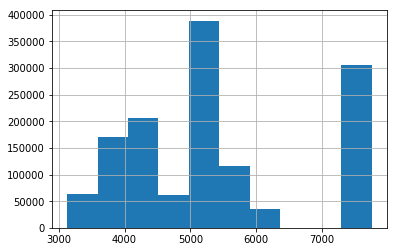

In [391]:
#Data Descriptives
merge['Issue_Hour_Loc_Count'].hist()

In [392]:
#Data Quality and Integrity
merge[merge.Modified_Location_Encode == 15]

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,...,Issue_Month,Issue_Month_Year,Issue_Weekday,Modified_Location_Encode,Issue_Hour_Loc_Count,t_risk_level,Issue_Weekday_Encode,time_coded,loc2,time_encoded
0,-76.990241,38.880276,3697391,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE EAST SIDE,VA,802346,3122.0,400847,...,1,2018-01,Wednesday,15,5154,1,6,afternoon,afternoon,0
1,-76.989837,38.880700,3711217,P168,NO FRONT TAGS.,FRONT OF 700 12TH ST SE SOUTH S*,VA,288859,3122.0,400882,...,1,2018-01,Wednesday,15,5436,1,6,morning,morning,2
2,-76.989837,38.880700,3717999,P344,VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CON...,700 12TH ST SE,MD,288859,3122.0,400882,...,1,2018-01,Wednesday,15,4051,0,6,evening,evening,1
3,-76.990241,38.880276,3718722,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,...,1,2018-01,Wednesday,15,5393,1,6,morning,morning,2
4,-76.990241,38.880276,3718875,P170,FAILURE TO DISPLAY CURRENT TAGS,700 BLOCK 12TH ST SE EAST SIDE,DC,802346,3122.0,400847,...,1,2018-01,Wednesday,15,7749,1,6,night,night,3
5,-76.990241,38.880276,3727289,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,...,1,2018-01,Wednesday,15,3129,0,6,night,night,3
6,-76.990241,38.880276,3728615,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,MD,802346,3122.0,400847,...,1,2018-01,Wednesday,15,3129,0,6,night,night,3
7,-76.990241,38.880276,3763680,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,700 BLOCK 12TH ST SE WEST SIDE,DC,802346,3122.0,400847,...,1,2018-01,Wednesday,15,5441,1,6,morning,morning,2
8,-76.990241,38.880276,3768817,P013,PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY,700 BLOCK 12TH ST SE WEST SIDE,MD,802346,3122.0,400847,...,1,2018-01,Wednesday,15,3129,0,6,night,night,3
9,-76.990241,38.880276,3778947,P170,FAILURE TO DISPLAY CURRENT TAGS,700 BLOCK 12TH ST SE EAST SIDE,NaN,802346,3122.0,400847,...,1,2018-01,Wednesday,15,7749,1,6,night,night,3


In [393]:
#Data Descriptives
merge.Issue_Hour_Loc_Count.describe()

count    1.347002e+06
mean     5.402487e+03
std      1.438769e+03
min      3.129000e+03
25%      4.279000e+03
50%      5.393000e+03
75%      5.999000e+03
max      7.749000e+03
Name: Issue_Hour_Loc_Count, dtype: float64

In [394]:
#Creating the Risk Variable 
merge['t_risk_level'] = merge['Issue_Hour_Loc_Count'] > 5000

In [395]:
#Data Checks 
merge.tail(5000)

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,...,Issue_Month,Issue_Month_Year,Issue_Weekday,Modified_Location_Encode,Issue_Hour_Loc_Count,t_risk_level,Issue_Weekday_Encode,time_coded,loc2,time_encoded
1342002,-77.054648,38.918396,4408149,P170,FAILURE TO DISPLAY CURRENT TAGS,2300 BLOCK BELMONT RD NW NORTH S*,DC,810928,9369.0,395261,...,12,2018-12,Sunday,344,5436,True,3,morning,morning,2
1342003,-77.054648,38.918396,4749962,P012,DISOBEYING OFFICIAL SIGN,2300 BLOCK BELMONT RD NW NORTH S*,MD,810928,9369.0,395261,...,12,2018-12,Thursday,344,4055,False,4,evening,evening,1
1342004,-77.055570,38.917360,4706363,P055,NO PARKING ANYTIME,2534 BELMONT RD NW,VA,275732,9369.0,395181,...,12,2018-12,Friday,344,5999,True,0,night,night,3
1342005,-77.054648,38.918396,5346909,P055,NO PARKING ANYTIME,BLOCK 2400 BELMONT RD NW NORTH S*,MD,810928,9369.0,395261,...,12,2018-12,Thursday,344,4055,False,4,evening,evening,1
1342006,-77.054648,38.918396,5506322,P055,NO PARKING ANYTIME,BLOCK 2400 BELMONT RD NW NORTH S*,MD,810928,9369.0,395261,...,12,2018-12,Monday,344,7749,True,1,night,night,3
1342007,-77.054648,38.918396,5508427,P055,NO PARKING ANYTIME,BLOCK 2400 BELMONT RD NW NORTH S*,MD,810928,9369.0,395261,...,12,2018-12,Friday,344,3761,False,0,evening,evening,1
1342008,-77.054648,38.918396,5551929,P055,NO PARKING ANYTIME,BLOCK 2400 BELMONT RD NW SOUTH S*,MD,810928,9369.0,395261,...,12,2018-12,Wednesday,344,4157,False,6,afternoon,afternoon,0
1342009,-77.054648,38.918396,5622905,P055,NO PARKING ANYTIME,BLOCK 2400 BELMONT RD NW NORTH S*,DC,810928,9369.0,395261,...,12,2018-12,Tuesday,344,4279,False,5,afternoon,afternoon,0
1342010,-77.054648,38.918396,5442639,P007,PARK IN A BUS ZONE,BLOCK OF 2300 BELMONT RD NW EAST S*,MD,810928,9369.0,395261,...,12,2018-12,Monday,344,5154,True,1,afternoon,afternoon,0
1342011,-77.054648,38.918396,5559483,P001,PARK ABREAST OF ANOTHER VEHICLE,BLOCK OF 2300 BELMONT RD NW EAST S*,VA,810928,9369.0,395261,...,12,2018-12,Saturday,344,5441,True,2,morning,morning,2


In [396]:
#Creating a Copy of the DataFrame
ticket_clean = merge

In [397]:
#Data Check
ticket_clean.shape

(1347002, 27)

In [399]:
#Data Check
ticket_clean.shape

(1347002, 27)

In [400]:
#Turning Risk Variable from Boolean to Binary
ticket_clean['t_risk_level'] = ticket_clean['t_risk_level']*1

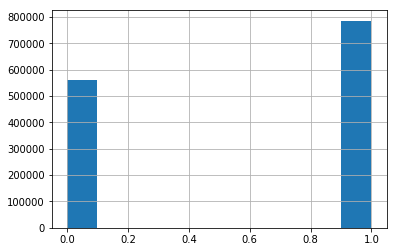

In [401]:
#Data Check to Identify Distribution
ticket_clean['t_risk_level'].hist()

In [402]:
#
ticket_clean.isnull().sum()

X                               0
Y                               0
OBJECTID                        0
VIOLATION_CODE                  0
VIOLATION_DESCRIPTION       45372
LOCATION                        0
RP_PLATE_STATE               7338
ADDRESS_ID                      0
STREETSEGID                     0
XCOORD                          0
YCOORD                          0
TICKET_ISSUE_DATE               0
ST_NAME                         0
QUADRANT                        0
modifed_st                      0
Issue_Hour                      0
Issue_Year                      0
Issue_Month                     0
Issue_Month_Year                0
Issue_Weekday                   0
Modified_Location_Encode        0
Issue_Hour_Loc_Count            0
t_risk_level                    0
Issue_Weekday_Encode            0
time_coded                      0
loc2                            0
time_encoded                    0
dtype: int64

In [403]:
ticket_clean.dtypes

X                                       float64
Y                                       float64
OBJECTID                                  int64
VIOLATION_CODE                           object
VIOLATION_DESCRIPTION                    object
LOCATION                                 object
RP_PLATE_STATE                           object
ADDRESS_ID                                int64
STREETSEGID                             float64
XCOORD                                    int64
YCOORD                                    int64
TICKET_ISSUE_DATE           datetime64[ns, UTC]
ST_NAME                                  object
QUADRANT                                 object
modifed_st                               object
Issue_Hour                                int64
Issue_Year                                int64
Issue_Month                               int64
Issue_Month_Year                      period[M]
Issue_Weekday                            object
Modified_Location_Encode                

In [447]:
def display_Confusion_Matrix(CM, labels=['Low Risk', 'High Risk']):
  df = pd.DataFrame(data=CM, index=labels, columns=labels)
  df.index.name='ACTUAL'
  df.columns.name='PREDICTED'
  df.loc['Overall']=df.sum()
  df['Overall']=df.sum(axis=1)
  return df

In [405]:
eval_metrics = pd.DataFrame(index=['Accuracy', 'Precision', 'TruePositiveRate'],
                      columns=['NULL', 'Log_Reg', 'Class_Tree', 'Naive_Bayes'])

In [415]:
feature_col = ['Issue_Month', 'Issue_Weekday_Encode', 'Modified_Location_Encode', 'time_encoded' ]
X = ticket_clean[feature_col]
y = ticket_clean.t_risk_level

print(X)
print(y)

         Issue_Month  Issue_Weekday_Encode  Modified_Location_Encode  \
0                  1                     6                        15   
1                  1                     6                        15   
2                  1                     6                        15   
3                  1                     6                        15   
4                  1                     6                        15   
5                  1                     6                        15   
6                  1                     6                        15   
7                  1                     6                        15   
8                  1                     6                        15   
9                  1                     6                        15   
10                 1                     6                        15   
11                 1                     6                        15   
12                 1                     6                      

In [416]:
#  Split into training / testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [448]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
eval_metrics.loc['Accuracy','NULL']=accuracy_score(y_pred=y_pred_test, y_true=y_test)
eval_metrics.loc['Precision', 'NULL']=precision_score(y_pred=y_pred_test, y_true=y_test, average='micro')
eval_metrics.loc['TruePositiveRate', 'NULL']=recall_score(y_pred=y_pred_test, y_true=y_test, average='micro')

CM=confusion_matrix(y_pred=y_pred_test, y_true=y_test)
display_Confusion_Matrix(CM)

PREDICTED,Low Risk,High Risk,Overall
ACTUAL,,,
Low Risk,0,168963,168963
High Risk,0,235138,235138
Overall,0,404101,404101


In [449]:
# Train a logistic regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [450]:
# Create prediction class for the testing set
y_prediction_class = logreg.predict(X_test)

In [451]:
# calculate null accuracy for the binary classifications coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.5818792826545839

In [421]:
# define y_predicted_prob for class 1
y_predicted_prob = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'No. of Citations')

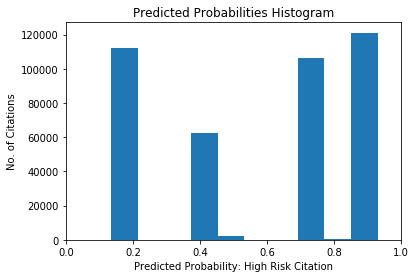

In [422]:
# histogram outlining where predicted probabilities lie in the spectrum
plt.hist(y_predicted_prob, bins=10)
plt.xlim(0, 1)
plt.title('Predicted Probabilities Histogram')
plt.xlabel('Predicted Probability: High Risk Citation')
plt.ylabel('No. of Citations')

In [423]:
logreg.score(X_test, y_test)

0.887711240506705

In [443]:
y_test.value_counts()

1    235138
0    168963
Name: t_risk_level, dtype: int64

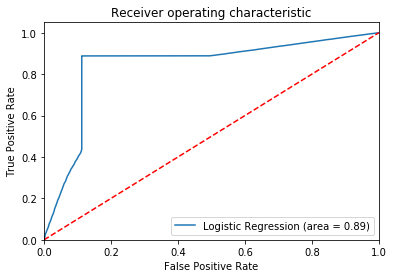

In [424]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [425]:
y_pred_test = logreg.predict(X_test)
eval_metrics.loc['Accuracy', 'Log_Reg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
eval_metrics.loc['Precision', 'Log_Reg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
eval_metrics.loc['TruePositiveRate', 'Log_Reg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

In [452]:
#  Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
display_Confusion_Matrix(CM, labels=['Low Risk', 'High Risk'])

PREDICTED,Low Risk,High Risk,Overall
ACTUAL,,,
Low Risk,0,168963,168963
High Risk,0,235138,235138
Overall,0,404101,404101


In [481]:
#  Defining Class Tree and Apply Classifier
classTree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=2, random_state=9)

In [482]:
#Fitting Model
classTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=9,
            splitter='best')

In [483]:
#  Evaluate the model
y_pred_test = classTree.predict(X_test)
eval_metrics.loc['Accuracy', 'Class_Tree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
eval_metrics.loc['Precision', 'Class_Tree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
eval_metrics.loc['TruePositiveRate', 'Class_Tree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

In [484]:
#Display Confustion Matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
display_Confusion_Matrix(CM)

PREDICTED,Low Risk,High Risk,Overall
ACTUAL,,,
Low Risk,150352,18611,168963
High Risk,28247,206891,235138
Overall,178599,225502,404101


In [431]:
from sklearn.naive_bayes import GaussianNB

In [432]:
# Define naiveBayes classifier and call algorithm
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [433]:
#  Evaluate Naive Bayes model's performance
y_pred_test = naiveBayes.predict(X_test)
eval_metrics.loc['Accuracy', 'Naive_Bayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
eval_metrics.loc['Precision', 'Naive_Bayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
eval_metrics.loc['TruePositiveRate', 'Naive_Bayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

In [479]:
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
display_Confusion_Matrix(CM)

PREDICTED,Low Risk,High Risk,Overall
ACTUAL,,,
Low Risk,0,168963,168963
High Risk,0,235138,235138
Overall,0,404101,404101


In [478]:
100*eval_metrics

,NULL,Log_Reg,Class_Tree,Naive_Bayes
Accuracy,58.1879,88.7711,88.4044,88.7711
Precision,58.1879,91.6503,91.7469,91.6503
TruePositiveRate,58.1879,88.7917,87.9871,88.7917


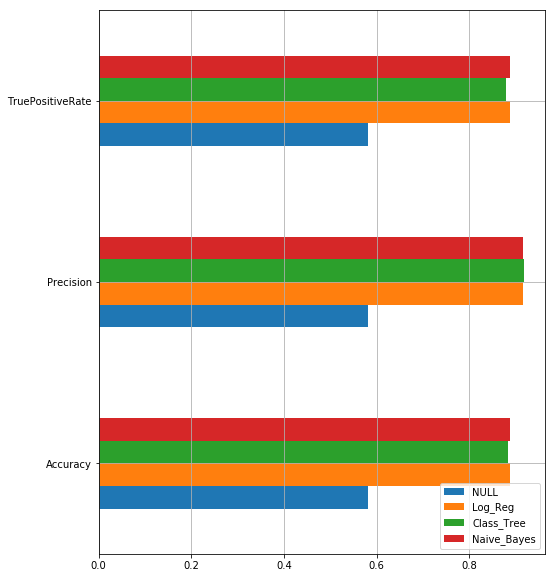

In [477]:
fig, ax = plt.subplots(figsize=(8,10))
eval_metrics.plot(kind='barh', ax=ax)
ax.grid()

In [318]:
#  Function to display models' cross validation scores
def display_score(s):
  print("Score: ", s)
  print("Mean: ", s.mean())
  print("Standard dev: ", s.std())

In [438]:
#  Evaluate log regression score
from sklearn.metrics import mean_squared_error
citation_pred = logreg.predict(X_train)
log_mean_squared_error = mean_squared_error(y_train, citation_pred)
log_rmse = np.sqrt(log_mean_squared_error)
log_rmse

0.3335038625868516

In [439]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, scoring = "neg_mean_squared_error", cv=10)
logreg_scores = np.sqrt(-scores)


In [440]:
display_score(logreg_scores)

('Score: ', array([0.33573039, 0.33231896, 0.33115205, 0.33302032, 0.33360896,
       0.33452962, 0.33362486, 0.33139216, 0.33367254, 0.33595322]))
('Mean: ', 0.3335003083578346)
('Standard dev: ', 0.0015391898117618021)


In [441]:
ticket_clean.dtypes

X                                       float64
Y                                       float64
OBJECTID                                  int64
VIOLATION_CODE                           object
VIOLATION_DESCRIPTION                    object
LOCATION                                 object
RP_PLATE_STATE                           object
ADDRESS_ID                                int64
STREETSEGID                             float64
XCOORD                                    int64
YCOORD                                    int64
TICKET_ISSUE_DATE           datetime64[ns, UTC]
ST_NAME                                  object
QUADRANT                                 object
modifed_st                               object
Issue_Hour                                int64
Issue_Year                                int64
Issue_Month                               int64
Issue_Month_Year                      period[M]
Issue_Weekday                            object
Modified_Location_Encode                

# Conclusion 
The logisitic regression will be selected based on the non-complexity. There is no justification for adding additional methodlogy and methods when both Naive Bayes and Logisitic Classifer performs the same.  